In [1]:
# load the data

import os
import glob 
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

import pickle  #upper threshold 값들을 저장하고 불러오기 위해서.

In [2]:
adata = sc.read_h5ad('data/results/11132021_ov_scRNA_step1.h5ad')


In [3]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)


normalizing by total count per cell
    finished (0:00:04): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [4]:
sc.pp.log1p(adata)


In [5]:
# compute variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
print("Highly variable genes: %d"%sum(adata.var.highly_variable))

extracting highly variable genes
    finished (0:00:11)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Highly variable genes: 2093


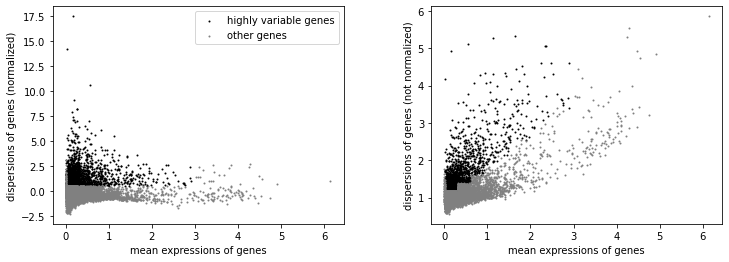

In [6]:
#plot variable genes
sc.pl.highly_variable_genes(adata)

In [7]:
# subset for variable genes in the dataset
adata = adata[:, adata.var['highly_variable']]

In [8]:
# regress out unwanted variables
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:02:39)


In [9]:
# scale data, clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)

In [10]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_pcs = 20)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:09)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:15)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:53)


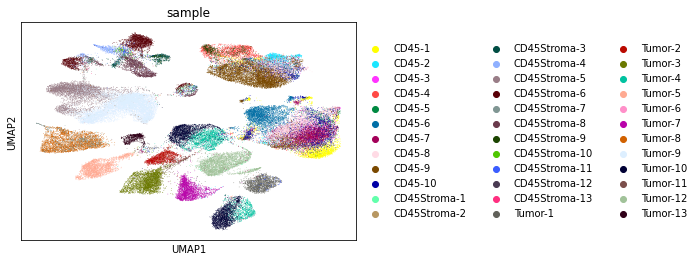

In [11]:
sc.tl.umap(adata)
sc.pl.umap(adata, color = 'sample')

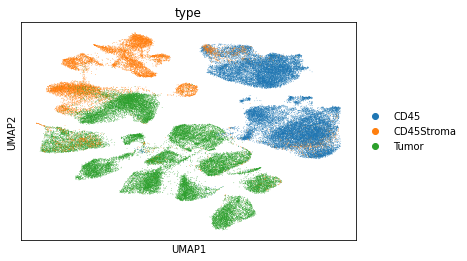

In [12]:
sc.pl.umap(adata, color = 'type')

2021-11-15 07:27:52,499 - harmonypy - INFO - Iteration 1 of 10
2021-11-15 07:28:33,155 - harmonypy - INFO - Iteration 2 of 10
2021-11-15 07:29:13,794 - harmonypy - INFO - Iteration 3 of 10
2021-11-15 07:29:54,805 - harmonypy - INFO - Converged after 3 iterations


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:53)


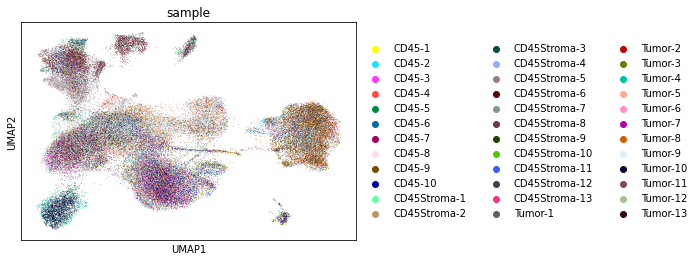

In [13]:
adata1 = adata.copy()
sc.external.pp.harmony_integrate(adata1, key = 'sample')
sc.pp.neighbors(adata1, n_pcs = 20, use_rep = 'X_pca_harmony')
sc.tl.umap(adata1)
sc.pl.umap(adata1, color = 'sample')

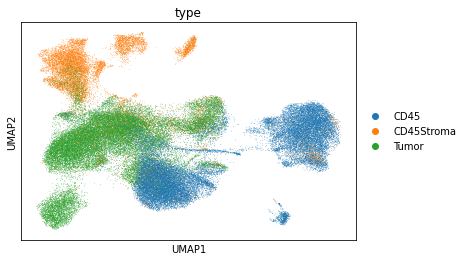

In [15]:
sc.pl.umap(adata1, color = 'type')

The result looks already good! 

In [17]:
adatax = adata.copy()
sc.pp.neighbors(adatax, n_pcs = 50)
sc.tl.umap(adatax, min_dist = .3)
sc.pl.umap(adatax, color = 'type')

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
computing UMAP


KeyboardInterrupt: 

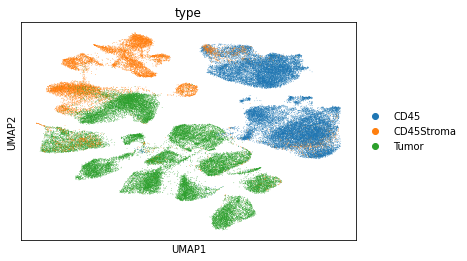

In [19]:
sc.pl.umap(adatax, color = 'type')

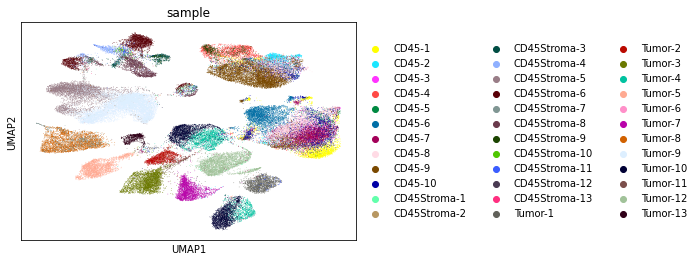

In [18]:

sc.pl.umap(adatax, color = 'sample')

2021-11-15 07:37:48,597 - harmonypy - INFO - Iteration 1 of 10
2021-11-15 07:38:24,030 - harmonypy - INFO - Iteration 2 of 10
2021-11-15 07:38:58,498 - harmonypy - INFO - Iteration 3 of 10
2021-11-15 07:39:34,795 - harmonypy - INFO - Converged after 3 iterations


computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:50)


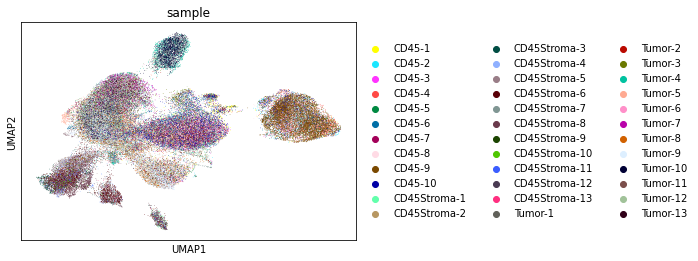

In [21]:
# my current workaround
adata2 = adata.copy()
sc.external.pp.harmony_integrate(adata2, key = 'sample', adjusted_basis='X_pca')
sc.pp.neighbors(adata2, n_pcs = 20)
sc.tl.umap(adata2)
sc.pl.umap(adata2, color = 'sample')

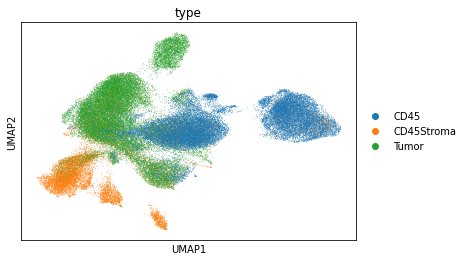

In [22]:
sc.pl.umap(adata2, color = 'type')